# PREDICTION USING SUPERVISED ML

# TASK 1
Predict the percentage of an student based on the no. of Study hours.

# WHAT  WILL BE THE PREDICTED SCORE IF STUDENT STUDIES FOR 9.25 HRS/DAY

In [2]:
#importing required libraries

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sns
from sklearn import metrics  

 


In [6]:
#loadig file

In [15]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")



Data imported successfully


# Perform appropriate Exploratory Data Analysis to understand the data

In [14]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [16]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [17]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [19]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [22]:
df.shape

(25, 2)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [29]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


# Visualisation of data

In [34]:
# Plotting the distribution of scores

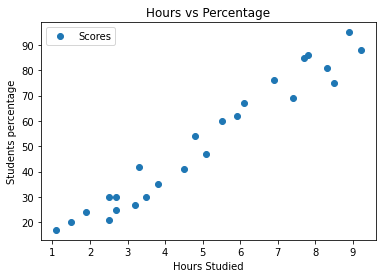

In [38]:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Students percentage')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# DATA PROCESSING

In [40]:
#Now,  we will divide data into attributes(Input) and Labels(Output) for further observations

In [42]:
x= df.iloc[:,:-1].values
y= df.iloc[:,1].values

# Model training

In [47]:
#Spliting a Dataset in Train and Test. Then train the algorithm
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.2,
random_state=0)
regressor = LinearRegression()
regressor.fit(x_train.reshape(-1,1),y_train)
print('Traning of data is complete')


Traning of data is complete


# Plotting the line Of Regression

In [78]:
#fitting the data 
regression = LinearRegression()
regression.fit(x_train, y_train)
print("---------Model Trained---------")

---------Model Trained---------


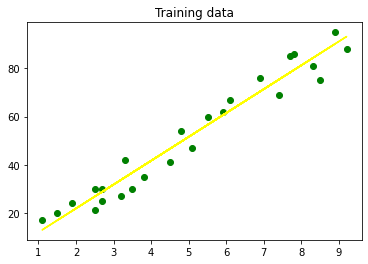

In [49]:
line = regressor.coef_*x+regressor.intercept_
plt.scatter(x,y, color= 'green')
plt.title('Training data')
plt.plot(x, line, color= 'yellow')
plt.show()

# Making Prediction

In [52]:
print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [66]:
y_predict = regressor.predict(x_test)


In [ ]:
#Comparing Actual Model with Predicted Model

In [73]:
df = pd.DataFrame({'Actual': y_test,'Predicted': y_predict})
print('Difference can be seen in Table Below')
df


Difference can be seen in Table Below


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Analysis

In [56]:
data_predict = regressor.predict([[9.25]])
data_predict


array([93.69173249])

In [57]:
#Evaluating the Model


The final step is to evalute the performance of algorithm. This step is particularly important
to compare how well different algorithms perform on a particular dataset. Here different
errors have been calculated to compare model performance and predict the accuracy.


In [70]:
print('Mean Absolute Error', mean_absolute_error(y_test, y_predict))
print('Mean Squared Error', mean_squared_error(y_test,y_predict))
print('Root Mean Squared Error', np.sqrt(mean_squared_error(y_test,y_predict)))
print('R-2', r2_score(y_test, y_predict))

Mean Absolute Error 4.183859899002975
Mean Squared Error 21.5987693072174
Root Mean Squared Error 4.6474476121003665
R-2 0.9454906892105356


In [68]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_predict)) 

Mean Absolute Error: 4.183859899002975


# What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [79]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.692


In [80]:
#conclusion

# We can conclude that if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.